# Working with gridded data
Gridded data works with a different protocol called griddap. Instead of using the erddapy library. It is easier to import the data in .netcdf using the package xarray and netcdf
Setting the constraints is a bit more straightforward

Gridded data URL: 

xarray works similarly as the pandas data package. 

In [10]:
import xarray as xr

In [11]:
import netCDF4 as nc

 Importing the downloaded data in Python. 
Now that we've downloaded the data locally, we can import it and extract our variables of interest:

In [115]:
import xarray as xr

server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = "jplG1SST"
full_URL = '/'.join([server,protocol,dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)

https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST


Inspect the dataframe:

In [105]:
print (da)

<xarray.Dataset>
Dimensions:         (latitude: 16000, longitude: 36000, time: 2632)
Coordinates:
  * time            (time) object 2010-06-09 12:00:00 ... 2017-09-13 00:00:00
  * latitude        (latitude) float32 -79.995 -79.985 -79.975 ... 79.985 79.995
  * longitude       (longitude) float32 -179.995 -179.985 ... 179.985 179.995
Data variables:
    SST             (time, latitude, longitude) float32 ...
    mask            (time, latitude, longitude) float32 ...
    analysis_error  (time, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    contact:                    Benyang.Tang@jpl.nasa.gov
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              Benyang.Tang@jpl.nasa.gov
    creator_name:               The JPL G1SST Team
    creator_type:               group
    creator_url:                http://sst.jpl.nasa.gov/SST/
    DSD_entry_id:               JPL_OUROCEAN-L4UHfnd-GLOB-G1SST
    Easternmost_Easting:        1

Getting the dataset without subsetting it creates an error -> the data set is too large to be downloaded completely.

In [98]:
sst = da['SST']
sst

MemoryError: Unable to allocate 5.52 TiB for an array with shape (2632, 16000, 36000) and data type float32

MemoryError: Unable to allocate 5.52 TiB for an array with shape (2632, 16000, 36000) and data type float32

Create subsets of your netcdf file:

For this exercise, the area we are interested in includes Monterey Bay, CA:

- Latitude range: 44.0N, 48.0N
- Longitude range: -128E, -121E
- Time range 2017-01-13T00:00:00Z to 2017-01-16T23:59:59Z

Xarray supports:
- label-based indexing using .sel
- position-based indexing using .isel


slice() function can take three parameters:
- start (optional) - Starting integer where the slicing of the object starts. Default to None if not provided.
- stop - Integer until which the slicing takes place. The slicing stops at index stop -1 (last element).


In [106]:
import xarray as xr

server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = "jplG1SST"
full_URL = '/'.join([server,protocol,dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)


sst = da['SST'].sel(  
                  latitude=slice(44., 48.),  
                  longitude=slice(-128, -121), 
                  time='2017-01-13T00:00:00'
                 )
sst



https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST


<xarray.DataArray 'SST' (time: 1, latitude: 400, longitude: 700)>
[280000 values with dtype=float32]
Coordinates:
  * time       (time) object 2017-01-13 00:00:00
  * latitude   (latitude) float32 44.005 44.015 44.025 ... 47.975 47.985 47.995
  * longitude  (longitude) float32 -127.995 -127.985 ... -121.015 -121.005
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    standard_name:    sea_surface_temperature
    type:             foundation
    units:            degree_C
    valid_max:        45.0
    valid_min:        -9.0

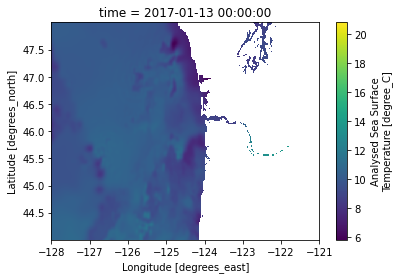

In [107]:
%matplotlib inline
sst.isel(time=0).plot.imshow()